In [238]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
%matplotlib inline

In [270]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("EuroToUSD.xlsx")

In [3]:
df.head()

,Date,ExchangeRateEuroTousd
0,2022-03-16,1.0994
1,2022-03-15,1.0991
2,2022-03-14,1.096
3,2022-03-11,1.099
4,2022-03-10,1.1084


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6005 entries, 0 to 6004
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   6005 non-null   datetime64[ns]
 1   ExchangeRateEuroTousd  6005 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 94.0+ KB


In [5]:
df.set_index("Date" , inplace=True)

In [6]:
df.sort_index(axis=0, level=None, ascending=True, inplace=True)

In [7]:
df.index = pd.to_datetime(df.index)

In [8]:
df_filtered = df[df['ExchangeRateEuroTousd'] != "-"]

In [9]:
df_filtered.ExchangeRateEuroTousd = df_filtered.ExchangeRateEuroTousd.astype(float)

C:\Users\eahkhan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5943 entries, 1999-01-04 to 2022-03-16
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ExchangeRateEuroTousd  5943 non-null   float64
dtypes: float64(1)
memory usage: 92.9 KB


In [12]:
df = df_filtered

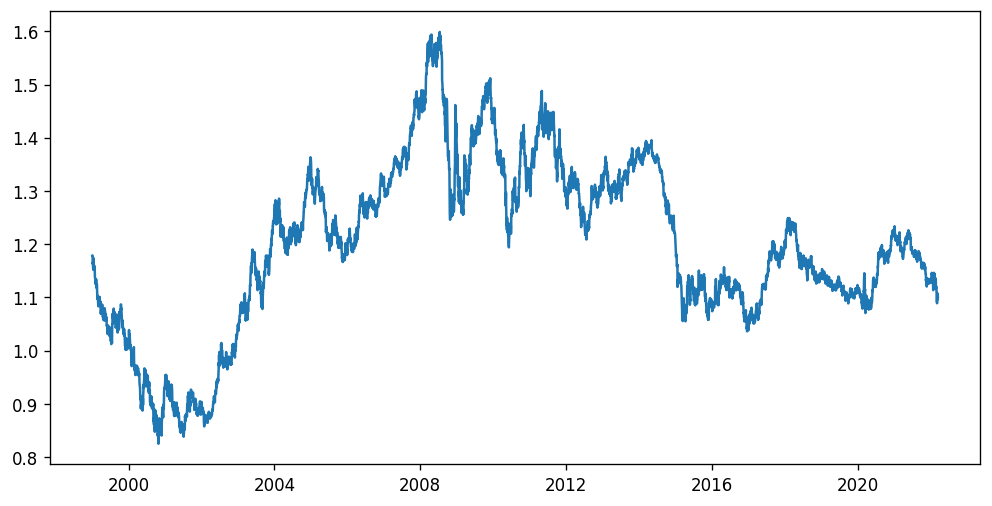

In [21]:
from matplotlib.pyplot import figure
figure(figsize=(10, 5), dpi=120)
plt.plot(df.ExchangeRateEuroTousd)

In [ ]:
df.head()

In [122]:
df_mon = df.resample('MS').mean()
df_Week = df.resample('W').mean()

In [123]:
df_Week

,ExchangeRateEuroTousd
Date,
1999-01-10,1.172260
1999-01-17,1.162240
1999-01-24,1.158840
1999-01-31,1.149780
1999-02-07,1.131340
...,...
2022-02-20,1.135140
2022-02-27,1.128060
2022-03-06,1.109440


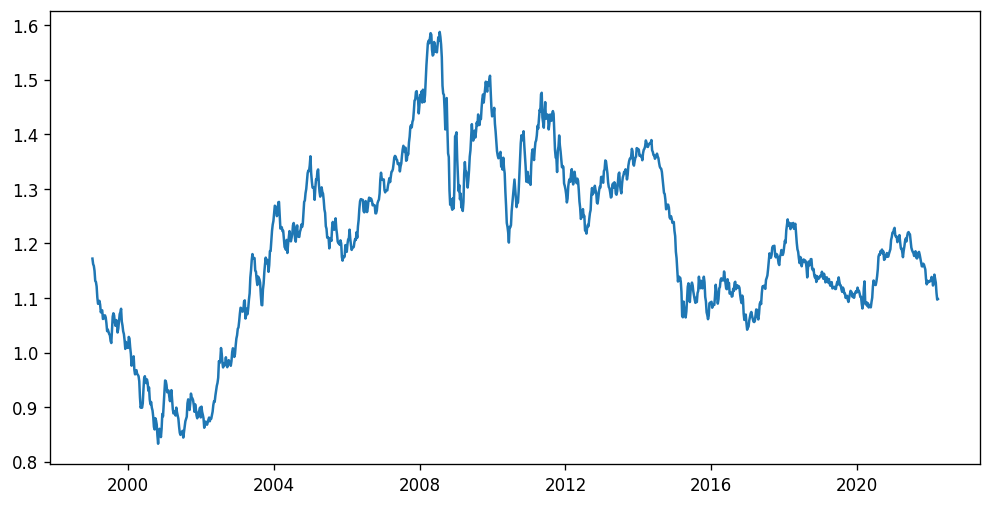

In [124]:
figure(figsize=(10, 5), dpi=120)
plt.plot(df_Week)

In [116]:
import statsmodels.api as sm

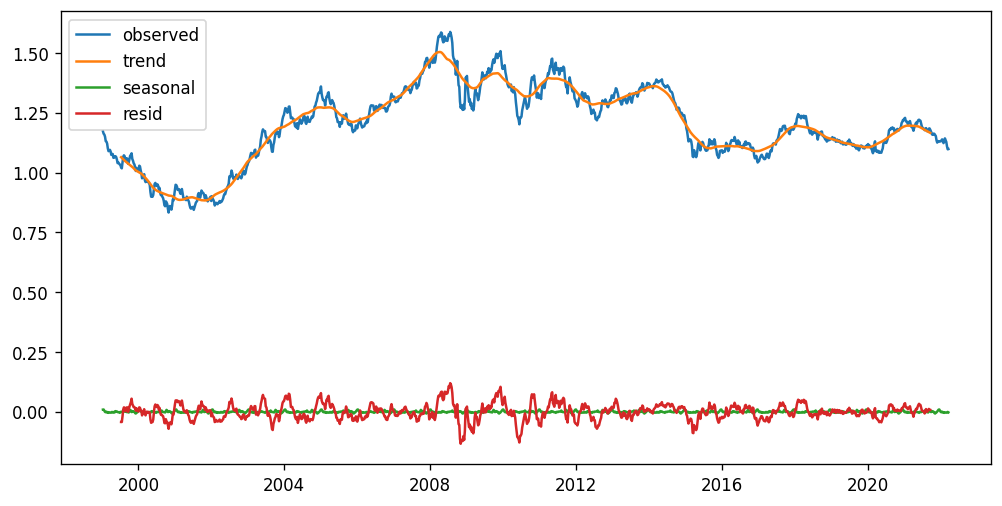

In [125]:
decomposition  = sm.tsa.seasonal_decompose(df_Week, model='addative')
plt.figure(figsize=(10, 5), dpi=120)
plt.plot(decomposition.observed)
plt.plot(decomposition.trend)
plt.plot(decomposition.seasonal)
plt.plot(decomposition.resid)
labels=['observed','trend','seasonal','resid']
plt.legend(labels , loc = 'best')
plt.show()

In [316]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(df_Week)

In [317]:
dftest

(-1.7995056119358561,
 0.3807071711702773,
 3,
 1207,
 {'1%': -3.43577938005948,
  '5%': -2.863937543790164,
  '10%': -2.568046493171221},
 -6966.000562454959)

In [315]:
print("The test statistic \t: ", adftest[0])
print("The pvalue         \t:", adftest[1])
print("Nnumber of lags used \t: ", adftest[2])
print("Number of observs for the ADF regression: ", adftest[3])
print("Critical values for the test statistic at the 1%: ",adftest[4]['1%'])
print("Critical values for the test statistic at the 5%: ",adftest[4]['5%'])
print("Critical values for the test statistic at the 10%: ",adftest[4]['10%'])

The test statistic 	:  -1.7995056119358561
The pvalue         	: 0.3807071711702773
Nnumber of lags used 	:  3
Number of observs for the ADF regression:  1207
Critical values for the test statistic at the 1%:  -3.43577938005948
Critical values for the test statistic at the 5%:  -2.863937543790164
Critical values for the test statistic at the 10%:  -2.568046493171221


In [133]:
train_test_split_sample_number = round(len(df_Week)*.8)

In [136]:
df_Week_train = df_Week[:train_test_split_sample_number]
df_Week_Test = df_Week[train_test_split_sample_number:]

In [139]:
df_Week_Test.head()

,ExchangeRateEuroTousd
Date,
2017-08-06,1.18192
2017-08-13,1.17678
2017-08-20,1.17376
2017-08-27,1.17890
2017-09-03,1.19268


In [138]:
df_Week_train.tail()

,ExchangeRateEuroTousd
Date,
2017-07-02,1.13330
2017-07-09,1.13696
2017-07-16,1.14146
2017-07-23,1.15354
2017-07-30,1.16818


# PACF plot to find the P value of AR in ARIMA 

## how many p lags to be Concsidered (Memory) of any time 

# ACF plot to find the Q value of MA in ARIMA

## how many q lags to be Concsidered (Memory) of any time 

# d is the time lags we need to substract to make the seriese stationary 

•	Time series: when all other factors are constant prediction of future values.
•	Differenent Methods of doing Time series Analysis and Forecasting
o	ARIMA model. 
o	Seasonaly ARIMA.  Most used.
o	Holt Winter Exponential Smoothing.Easiest and effective model.Link
o	Advanced Models (..Cooning soon! Start only after above 3 are done.)

1.	Important Concepts and terminology in Time series Analysis.
o	Stationarity. To know everything follow the link. 
	A stationary time series is one whose properties(ie mean, variance, autocorrelation) does not depend on the time.
o	Autoregression AR. 
o	Moving Average MA
o	Integration & Difference
o	ACF and PACF Plots
o	Time series components:
	Trend: long term smooth movement, upward or downward
	Seasonal: periodic fluctuation, less than 1 year, most commonly found in industry.
	Cyclical: periodic fluctuation, more than 1 year.
	irregularity: random movement.
•	ARIMA is the Most common model used for time series forecasting. It has 3 components.
1.	Autoregression AR. 
2.	Moving Average MA
3.	Integrated

1.	Autoregression AR.
o	Future values of Y is dependent of previous lagged values of Y.
o	regression of yt on yt-1, yt-2 .
o	P = ORDER OF AR; current value of y is dependent on how many previous lagged values of current Y. if p=2 that means yt is dependent on yt-1 and yt-2.
o	P from PACF 
o	Interpretation of PACF: 
2.	Moving Average MA.
o	Future values of Y is dependent of previous lagged values of white noise i.e. the irregular component. white noise is just  the error. error is the difference between the actual value and predicted value. so we take into consideration the error also to predict the future value.
o	autocorrelation between the errors.
o	Trend, s, c components of TS is captured in AR whereas the irregular comp is captured in MA.
o	q is order of MA.
o	ACF gives q.

3.	Integrated
o	Intergrated means no of times we difference the data then we have to integrated it back to get the original series back.
o	We difference to remove trend and seasonality to it stationary series as only after making a series stationary we can implement AR and MA.


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

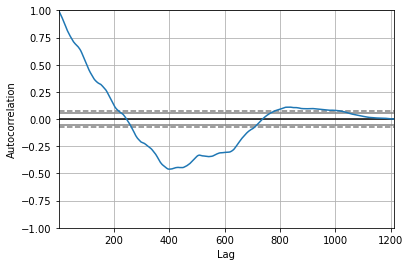

In [141]:
autocorrelation_plot(df_Week)

In [291]:
from statsmodels.tsa.arima.model import ARIMA

In [280]:
model1 = ARIMA(df_Week_train, order=(1, 2, 4))

In [281]:
model_fit = model1.fit()

In [282]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:     ExchangeRateEuroTousd   No. Observations:                  969
Model:                    ARIMA(1, 2, 4)   Log Likelihood                2776.922
Date:                   Sat, 26 Mar 2022   AIC                          -5541.843
Time:                           02:01:50   BIC                          -5512.598
Sample:                       01-10-1999   HQIC                         -5530.710
                            - 07-30-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9705      0.120     -8.076      0.000      -1.206      -0.735
ma.L1          0.2394      0.124      1.933      0.053      -0.003       0.482
ma.L2         -0.9798      0.087    -11.296      0.000      -1.150      -0.810
ma.L3         -0.2612      0.038     -6.861      0.000      -0.336      -0.187
ma.L4          0.0065      0.029      0.223      0.824      -0.050       0.063
sigma2         0.0002   6.17e-06     30.093      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               205.99
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                            -0.15
Prob(H) (two-sided):                  0.95   Kurtosis:                         5.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [283]:
pred = model_fit.predict(start=len(df_Week_train),end=len(df_Week)-1)

In [284]:
pred

2017-08-06    1.171129
2017-08-13    1.171002
2017-08-20    1.170842
2017-08-27    1.170791
2017-09-03    1.170633
                ...   
2022-02-20    1.146198
2022-02-27    1.146093
2022-03-06    1.145988
2022-03-13    1.145883
2022-03-20    1.145778
Freq: W-SUN, Name: predicted_mean, Length: 242, dtype: float64

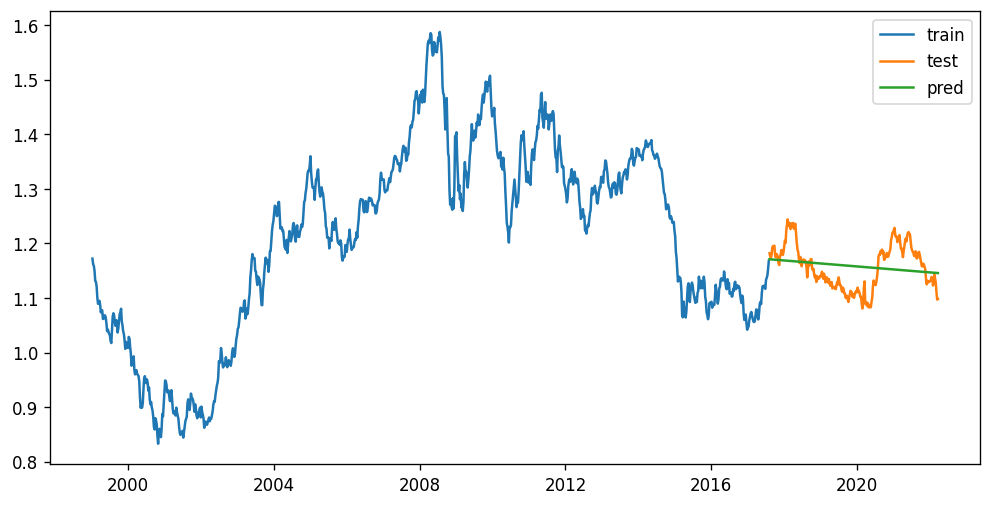

In [285]:
figure(figsize=(10, 5), dpi=120)
plt.plot(df_Week_train)
plt.plot(df_Week_Test)
plt.plot(pred)
labels=['train','test','pred']
plt.legend(labels , loc = 'best')

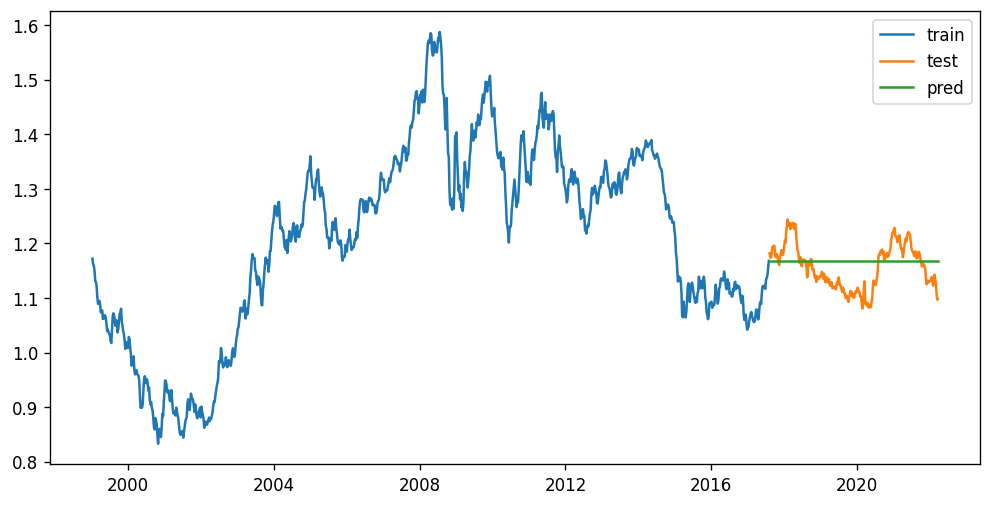

In [200]:
figure(figsize=(10, 5), dpi=120)
plt.plot(df_Week_train)
plt.plot(df_Week_Test)
plt.plot(pred)
labels=['train','test','pred']
plt.legend(labels , loc = 'best')

In [201]:
from sklearn.metrics import mean_squared_error

In [202]:
mean_squared_error(df_Week_Test,pred)

0.0017853628954889811

In [207]:
from statsmodels.tools.eval_measures import mse

In [211]:
mse(df_Week_Test,pred,axis=0).mean()

0.0017853628954889805

In [213]:
df_Week_Test.std(),df_Week_Test.mean()

(ExchangeRateEuroTousd    0.040868
 dtype: float64,
 ExchangeRateEuroTousd    1.15713
 dtype: float64)

# ACF and PACF plots from Stats Model

In [214]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

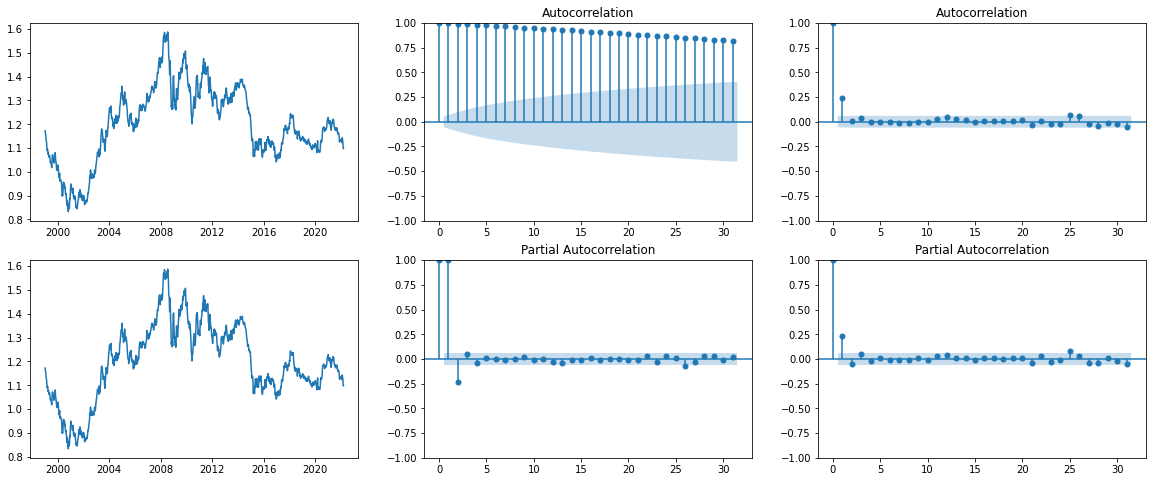

In [235]:
fig,axes = plt.subplots(2,3,figsize=(20,8))
axes[0,0].plot(df_Week)
plot_acf(df_Week,ax=axes[0,1])
plot_acf(df_Week.diff().dropna(),ax=axes[0,2])
axes[1,0].plot(df_Week)
plot_pacf(df_Week,ax=axes[1,1],method='ywm')
plot_pacf(df_Week.diff().dropna(),ax=axes[1,2],method='ywm')
plt.show()
#axes[0,0].plot(df_Week)

In [295]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model2_sarimax = SARIMAX(df_Week_train,order=(1, 2, 4), seasonal_order=(1, 2, 4, 12))

In [296]:
model2_sarimax.fit()

KeyboardInterrupt: 

In [ ]:
model2_sarimax.pr

# Finding best P D Q values from Iterative combination

In [236]:
import itertools

In [253]:
p = range(0,8) 
q = range(0,8)  
d = range(0,3)  

In [261]:
pdq_combinations = list(itertools.product(p,d,q))

In [267]:
len(pdq_combinations)

192

In [286]:
order_list = []
RMSE_List = []
for pdq in pdq_combinations:
    try:
        model = ARIMA(df_Week_train, order=pdq).fit()
        pred = model.predict(start=len(df_Week_train),end=len(df_Week)-1)
        error = np.sqrt(mean_squared_error(df_Week_Test,pred))
        order_list.append(pdq)
        RMSE_List.append(error)
    
    except:
        continue


In [272]:
best_settings = pd.DataFrame(index=order_list, data=RMSE_List, columns=['RMSE'])

In [279]:
best_settings.to_csv('ARIMA_Results.csv')

In [288]:
best_settings.index[best_settings['RMSE'] == best_settings['RMSE'].min()][0]

(1, 2, 4)

# Identifying P D Q values ACF PACF Charts

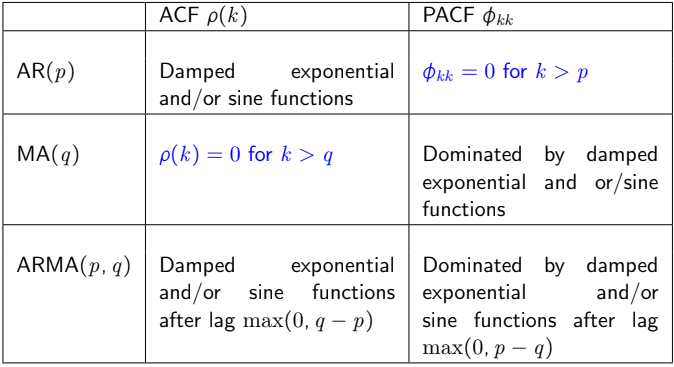

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

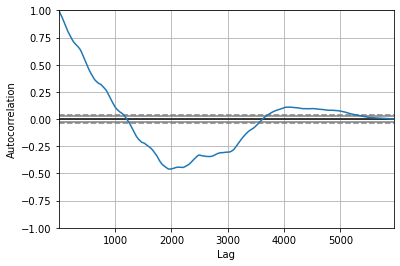

In [367]:
autocorrelation_plot(df.ExchangeRateEuroTousd)

In [369]:
df.ExchangeRateEuroTousd.mean()

1.1982811711256942

In [385]:
df['df_lag1'] = df.ExchangeRateEuroTousd.shift(periods=1, freq=None, axis=0) 
df['df_lag10'] = df.ExchangeRateEuroTousd.shift(periods=10, freq=None, axis=0) 
df['df_lag100'] = df.ExchangeRateEuroTousd.shift(periods=100, freq=None, axis=0) 
df['df_lag1200'] = df.ExchangeRateEuroTousd.shift(periods=1200, freq=None, axis=0) 
df['rate-mean'] = df.ExchangeRateEuroTousd-df.ExchangeRateEuroTousd.mean()
df['rol_150-mean'] = df['ExchangeRateEuroTousd'].rolling(150).mean()

In [386]:
df.head()

,ExchangeRateEuroTousd,df_lag1,df_lag10,df_lag100,df_lag1200,_mean,rate-mean,rol_150-mean
Date,,,,,,,,
1999-01-04,1.1789,NaN,NaN,NaN,NaN,1.198281,-0.019381,NaN
1999-01-05,1.1790,1.1789,NaN,NaN,NaN,1.198281,-0.019281,NaN
1999-01-06,1.1743,1.1790,NaN,NaN,NaN,1.198281,-0.023981,NaN
1999-01-07,1.1632,1.1743,NaN,NaN,NaN,1.198281,-0.035081,NaN
1999-01-08,1.1659,1.1632,NaN,NaN,NaN,1.198281,-0.032381,NaN


In [387]:
Diff1_serise = df.ExchangeRateEuroTousd - df.df_lag1

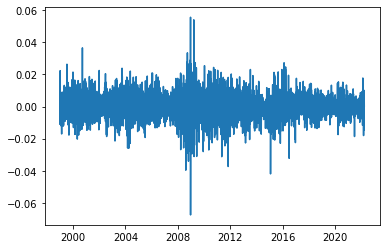

In [388]:
Diff1_serise = Diff1_serise.dropna()
plt.plot(Diff1_serise)

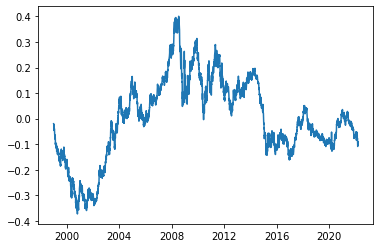

In [389]:
plt.plot(df['rate-mean'])

In [392]:
New_df = df[~df['rol_150-mean'].isna()]

In [395]:
New_df.head()

,ExchangeRateEuroTousd,df_lag1,df_lag10,df_lag100,df_lag1200,_mean,rate-mean,rol_150-mean
Date,,,,,,,,
1999-07-30,1.0694,1.0680,1.0202,1.0932,NaN,1.198281,-0.128881,1.080913
1999-08-02,1.0665,1.0694,1.0146,1.0949,NaN,1.198281,-0.131781,1.080163
1999-08-03,1.0645,1.0665,1.0410,1.0901,NaN,1.198281,-0.133781,1.079400
1999-08-04,1.0761,1.0645,1.0462,1.0966,NaN,1.198281,-0.122181,1.078745
1999-08-05,1.0791,1.0761,1.0499,1.1012,NaN,1.198281,-0.119181,1.078185


In [399]:
New_df['rate_minus_rolMean'] = New_df['ExchangeRateEuroTousd'] - New_df['rol_150-mean']

C:\Users\eahkhan\AppData\Local\Temp/ipykernel_16092/1765186037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df['rate_minus_rolMean'] = New_df['ExchangeRateEuroTousd'] - New_df['rol_150-mean']


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

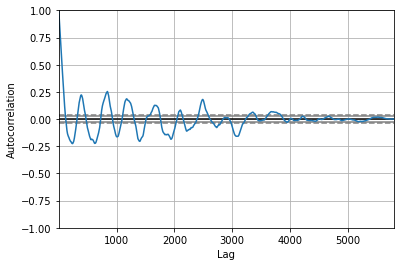

In [404]:
autocorrelation_plot(New_df['rate_minus_rolMean'])

In [400]:
Diff1_serise.mean()

-1.3379333557724693e-05

In [304]:
Diff1_serise

Date
1999-01-05    0.0001
1999-01-06   -0.0047
1999-01-07   -0.0111
1999-01-08    0.0027
1999-01-11   -0.0090
               ...  
2022-03-10    0.0091
2022-03-11   -0.0094
2022-03-14   -0.0030
2022-03-15    0.0031
2022-03-16    0.0003
Length: 5942, dtype: float64

[]

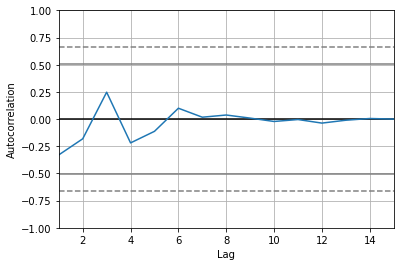

In [305]:
x = autocorrelation_plot(Diff1_serise[:15])
x.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

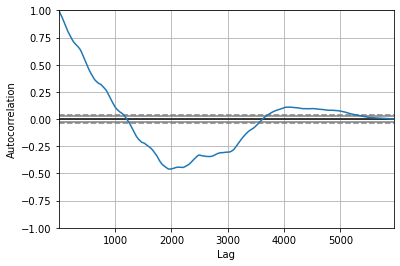

In [306]:
autocorrelation_plot(df.ExchangeRateEuroTousd)

In [308]:
df.mean()[0]

1.1982811711256942

In [309]:
df['_mean'] = df.mean()[0]

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

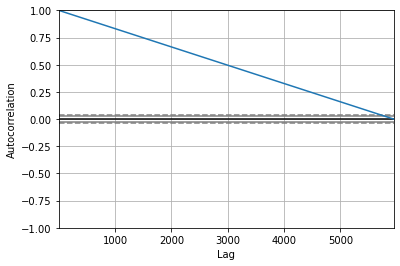

In [310]:
autocorrelation_plot(df._mean)

In [311]:
df['_mean']

Date
1999-01-04    1.198281
1999-01-05    1.198281
1999-01-06    1.198281
1999-01-07    1.198281
1999-01-08    1.198281
                ...   
2022-03-10    1.198281
2022-03-11    1.198281
2022-03-14    1.198281
2022-03-15    1.198281
2022-03-16    1.198281
Name: _mean, Length: 5943, dtype: float64

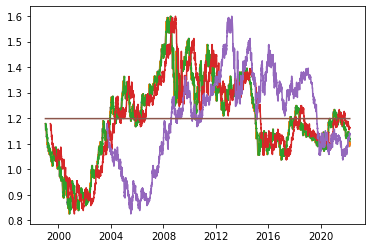

In [312]:
plt.plot(df)

In [346]:
import numpy as np
time = np.arange(0, 50, .1);
y = np.sin(time)

In [347]:
time

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [348]:
New_y = y+((50-time)/50)+1

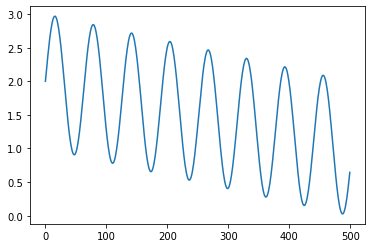

In [349]:
plt.plot(New_y)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

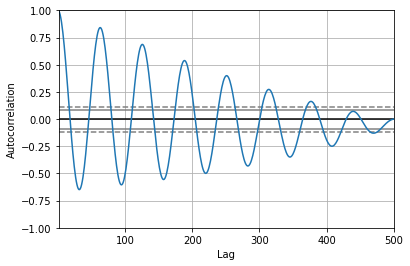

In [351]:
autocorrelation_plot(New_y)

In [361]:
def decay_cosine(t, amp, beta, omega, phi):
    """model data as decaying cosine wave"""
    return amp * np.exp(-beta*t)* np.cos(omega*t + phi)
t = np.linspace(0, 10, 100)
y = decay_cosine(t, 1.4, 0.9, 7.2, 0.23) + np.random.normal(size=len(t), scale=0.01)

In [362]:
result = np.where(y<=0, 0, y)

In [363]:
result

array([1.35477977e+00, 7.15924160e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.33502394e-01,
       6.66115150e-01, 5.44855140e-01, 1.88585839e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.19886398e-02,
       2.63902513e-01, 2.83992658e-01, 2.11917508e-01, 1.63933070e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.89737640e-02, 1.24946755e-01, 1.22670556e-01, 6.60737610e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.22532301e-02, 6.16880726e-02, 5.84779661e-02, 6.05932612e-02,
       2.86585157e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.06141238e-03, 3.47190292e-02, 3.33780152e-02,
       1.86790733e-02, 7.50269795e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.82815823e-03, 1.83332302e-02,
       1.78929508e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

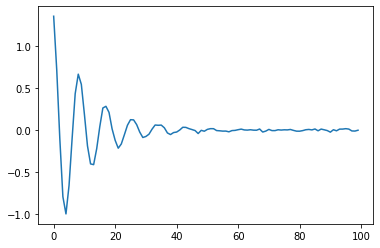

In [364]:
plt.plot(y)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

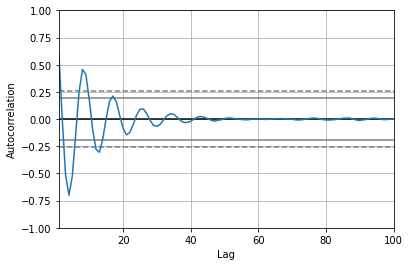

In [365]:
autocorrelation_plot(y)